# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$w_{new} = w_{old} - \alpha \nabla_{w} Q(w_{old}) = w_{old} - 2\alpha\left[  \frac{w_{old}}{C} - \frac{1}{N}\sum_{i=1}^{N} (y_i - x_i w_i)x_i \right]$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$w_{new} = w_{old} - \alpha \nabla_{w} Q(w_{old}) = w_{old} - \alpha\left[ \frac{1}{N\ln2} \sum_{i=1}^{N}\frac{x_i y_i + (y-1)x_i y_i e^{x_i w_{old}}}{1 + e^{x_i w_{old}}} + 2\frac{w_{old}}{C}\right]=$$
$$=w_{old} - \alpha\left[\frac{1}{N\ln2}\sum_{i=1}^{N}(y_i-a(x_i))x_i + 2\frac{w_{old}}{C}\right]$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Решение:

1) Итак, запишем Гессиан :
$$H(f(w)) = \begin{equation*}
\left(
\begin{array}{cccc}
\frac{\partial^2 f(x)}{\partial w_0^2} & \frac{\partial^2 f(x)}{\partial w_{0}\partial w_1} & \ldots & \frac{\partial^2 f(x)}{\partial w_{0}\partial w_D}\\
\frac{\partial^2 f(x)}{\partial w_1\partial w_0} & \frac{\partial^2 f(x)}{\partial w_1^2} & \ldots & \frac{\partial^2 f(x)}{\partial w_{1}\partial w_D}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial^2 f(x)}{\partial w_D\partial w_0} & \frac{\partial^2 f(x)}{\partial w_D\partial w_1} & \ldots & \frac{\partial^2 f(x)}{\partial w_D^2}
\end{array}
\right)
\end{equation*}$$

И наше уравнение $f(w) = \frac{1}{N}\left( w^TX^TXw - w^TX^Ty - y^TXw +y^Ty\right)$ Тогда итоговый Гессиан будет выглядеть как:


$$H(f(w)) = \begin{equation*}
\left(
\begin{array}{cccc}
\frac{2}{N}x_0^Tx_0 & \frac{2}{N}x_0^Tx_1 & \ldots & \frac{2}{N}x_0^Tx_D\\
\frac{2}{N}x_0^Tx_1 & \frac{2}{N}x_1^Tx_1 & \ldots & \frac{2}{N}x_1^Tx_D\\
\vdots & \vdots & \ddots & \vdots\\
\frac{2}{N}x_D^Tx_0 & \frac{2}{N}x_D^Tx_1 & \ldots & \frac{2}{N}x_D^Tx_D
\end{array}
\right)
\end{equation*} = \frac{2}{N}X^TX$$

А, значит, мы нашли очевидную невырожденную матрицу, чей квадрат равен нашему Гессиану и по теореме линейной алгебры положительно определен

2) Запишем результат с L2 регуляризацией:

$$\nabla_w{f(w)} = \nabla_w\left[{\frac{1}{N}\left( w^TX^TXw - w^TX^Ty - y^TXw +y^Ty\right) + \frac{R(w)}{C}}\right]=$$
$$=(X^TX + X^TX)w-2X^Ty + 2\frac{w}{C}=0$$
$$\Rightarrow w = (X^TX - \frac{I}{C})^{-1}X^Ty$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Решение: 

1) посчитаем производную по $a(x_i)$ у мат ожидания:

$$\frac{\partial E(L|x_i)}{\partial a(x_i)} = \left[\frac{-p(y_i = 1 |x_i )}{a(x_i)} + \frac {p(y_i = 0 | x_i)}{1 - a(x_i)}\right]\frac{1}{\ln2} = \left[\frac{-p(y_i = 1 |x_i ) + a(x_i)(p(y_i = 0 | x_i) + p(y_i = 1 | x_i))}{a(x_i) (1 - a(x_i))}\right]\frac{1}{\ln2} = 0$$

$$\Rightarrow a(x_i) = p(y_i = 1 |x_i )$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение***

Итак, мы вводим нулевой вес(вектор $w_0$), чтобы отсечь тот случай, когда значение всей функции равно нулю, те признаки ~0. $\Rightarrow$ при регуляризации свободного члена мы получим, что наш алгоритм будет работать хорошо, только если объекты сконцентрированы в окрестности нуля, что не правда для общего случая. Тогда не нужно

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [6]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [7]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [8]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [9]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [3]:
import sklearn as sklearn

In [10]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    if shuffle == True:
        X, y = sklearn.utils.shuffle(X, y)
    n = y.shape[0]
    for i in range(0, n, batch_size):
        X_batch = np.array(X[i:(i + batch_size)], dtype='float')
        y_batch = np.array(y[i:(i + batch_size)], dtype='float')
        yield (X_batch, y_batch)
        
"""
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
"""

'\n    Гератор новых батчей для обучения\n    X          - матрица объекты-признаки\n    y_batch    - вектор ответов\n    shuffle    - нужно ли случайно перемешивать выборку\n    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)\n    Генерирует подвыборку для итерации спуска (X_batch, y_batch)\n'

In [144]:
#%%pycodestyle
from math import exp
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x

def my_log(x):
    x = np.where(x<=0.1, x + 0.001, x)
    x = np.where(x==1, x + 0.001, x)
    ans = np.log2(x)
    #print(x,ans, sep='__')
    return ans


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.1, max_epoch=10, batch_size=1, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        #tmp1 = X_batch.shape[0]
        L2_reg = np.sum(self.weights * self.weights) / self.C
        alg_predict = np.dot(X_batch, self.weights)
        if self.model_type != 'lin_reg':
            loss = -np.sum((1-y_batch) * my_log(1 - sigmoid(alg_predict))+y_batch*my_log(sigmoid(alg_predict)))/X_batch.shape[0]
            loss += L2_reg  
        else:
            loss = np.sum((y_batch - alg_predict)**2) / X_batch.shape[0]
            loss += L2_reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = X_batch.shape[0]
        L2_reg = self.weights / self.C
        alg_predict = np.dot(X_batch, self.weights)
        #print(alg_predict)
        #alg_predict = alg_predict.reshape(1, -1)
        if self.model_type != 'lin_reg':
            loss_grad = np.dot(sigmoid(alg_predict) -y_batch, X_batch) / N / np.log(2)
            loss_grad += 2 * L2_reg
        else:
            loss_grad = np.dot(alg_predict - y_batch, X_batch) / N
            loss_grad += L2_reg
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.array(X, dtype=np.float64)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        np.random.seed(42)
        self.weights = np.random.uniform(0, 42, size=X.shape[1]).astype(np.float64)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        x = np.c_[np.ones(X.shape[0]), X]
        if self.model_type == 'lin_reg':
            y_hat = np.dot(x, self.weights)
        else:
            y_hat = sigmoid(np.dot(x, self.weights))
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [119]:
def plot_decision_boundary(weights, color = "black"):
    l = np.linspace(-3, 8)
    plt.plot(l, -(weights[0] + weights[1] * l) / weights[2], color = color)

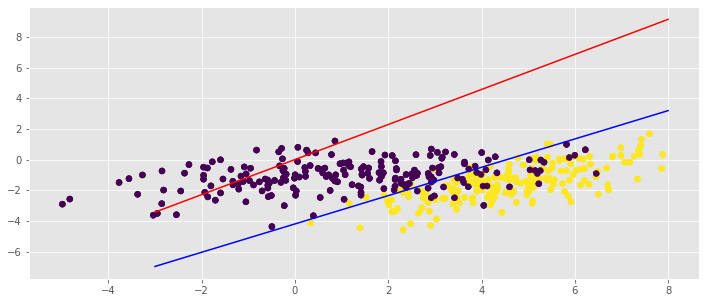

In [120]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

#log_reg = MySGDClassifier(batch_generator, max_epoch=100, C=200, model_type='log_reg')
#log_reg.fit(X, y)

#plot_decision_boundary(log_reg.weights)

my_lin_reg = MySGDClassifier(batch_generator, alpha=0.01, max_epoch=100, C=200, model_type='log_reg')
my_lin_reg.fit(X, y)
#X.append(np.ones())
clf = SGDClassifier(loss='log').fit(X, y)

plot_decision_boundary(my_lin_reg.weights, color = "blue")
x = np.linspace(-3, 8)
k = ((clf.coef_[0][0]) * x)/-clf.coef_[0][1]
line2, = plt.plot(x, k, '-r', label='sklearn')

plt.scatter(X[:,0], X[:,1], c=y)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [101]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

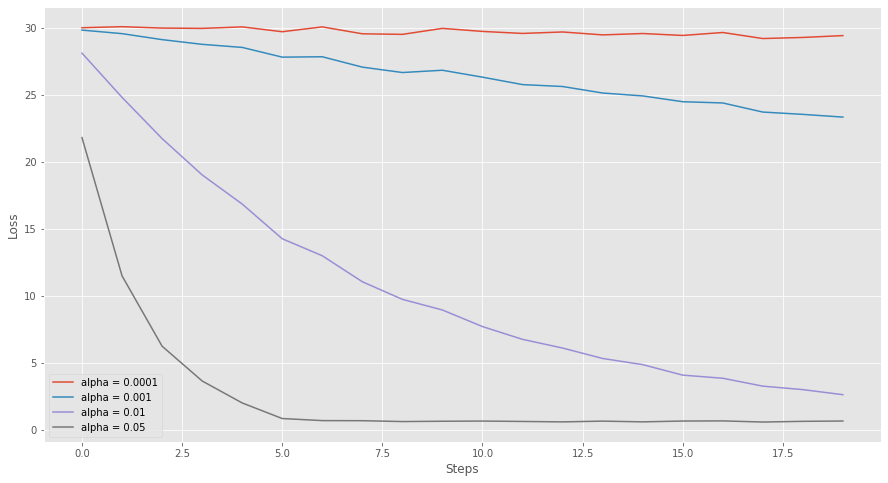

In [42]:
## Your Code Here
plt.figure(figsize=(15, 8))
aplha_arr = [0.0001, 0.001, 0.01, 0.05]
N = 200
for alpha in aplha_arr:
    log_reg = MySGDClassifier(alpha=alpha, batch_generator=batch_generator,max_epoch=10, C=100,batch_size=1, model_type='log_reg')
    log_reg.fit(X, y)
    steps = len(log_reg.errors_log['loss']) // N
    losses = []
    for i in range(steps):
        losses.append(np.sum(log_reg.errors_log['loss'][i * N :N*(i + 1)]) / N)
    plt.plot(np.arange(len(losses)), losses, label='alpha = {}'.format(alpha))
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

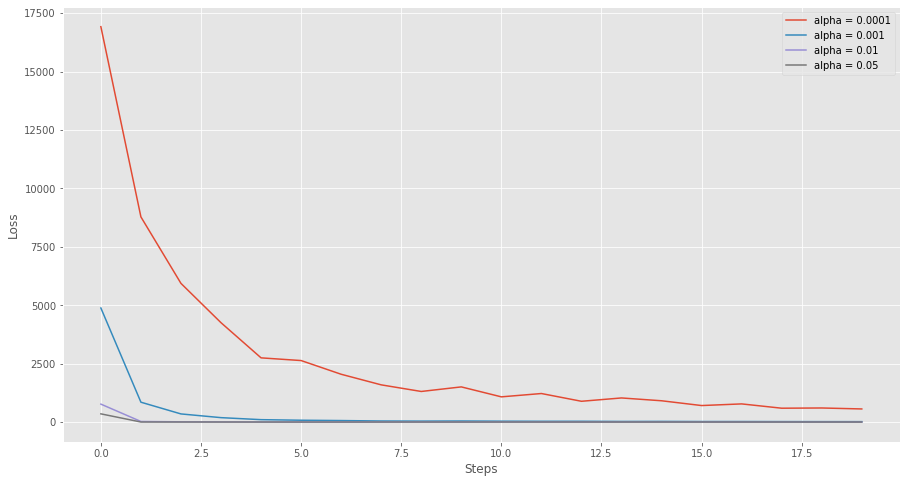

In [43]:
## Your Code Here
plt.figure(figsize=(15, 8))
aplha_arr = [0.0001, 0.001, 0.01, 0.05]
N = 200
for alpha in aplha_arr:
    lin_reg = MySGDClassifier(alpha=alpha, batch_generator=batch_generator,max_epoch=10, C=100,batch_size=1, model_type='lin_reg')
    lin_reg.fit(X, y)
    steps = len(lin_reg.errors_log['loss']) // N
    losses = []
    for i in range(steps):
        losses.append(np.sum(lin_reg.errors_log['loss'][i * N :N*(i + 1)]) / N)
    plt.plot(np.arange(len(losses)), losses, label='alpha = {}'.format(alpha))
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

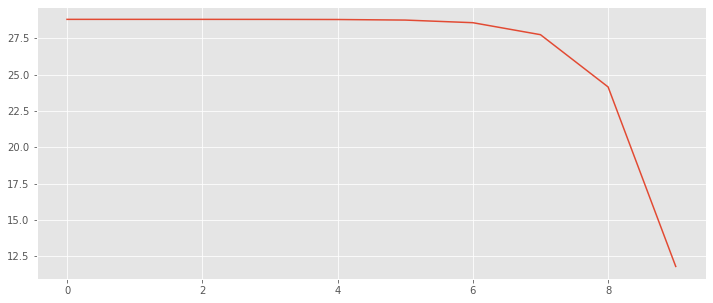

In [45]:
C = np.logspace(3, -3, 10)
my_res = []
for c in C:
    log_reg = MySGDClassifier(batch_generator=batch_generator, max_epoch=1, 
                              C=c, alpha=0.0001, batch_size=100, model_type='log_reg')
    log_reg.fit(X, y)
    my_res.append(np.mean(log_reg.weights))
plt.plot(range(len(my_res)), my_res)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [50]:
from bs4 import BeautifulSoup
import codecs
import pandas as pd

In [51]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [53]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [54]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [63]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=50)
#classifier.fit(X_train, y_train)
#print(f1_score(y_train, (classifier.predict(X_train) > 0.48).astype(int)))
sp = kf.split(X_train)
scores = []
for i, j in sp:
    classifier.fit(X_train[i], y_train[i])
    scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.5).astype(int)))
print(sum(scores) / float(len(scores)))
classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=25)
sp = kf.split(X_train)
scores = []
for i, j in sp:
    classifier.fit(X_train[i], y_train[i])
    scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.5).astype(int)))
print(sum(scores) / float(len(scores)))
classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=10)
sp = kf.split(X_train)
scores = []
for i, j in sp:
    classifier.fit(X_train[i], y_train[i])
    scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.5).astype(int)))
print(sum(scores) / float(len(scores)))
classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=30)
sp = kf.split(X_train)
scores = []
for i, j in sp:
    classifier.fit(X_train[i], y_train[i])
    scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.5).astype(int)))
print(sum(scores) / float(len(scores)))

0.6145564068335444
0.615251185670851
0.6164468951012992
0.6154207104435642


In [132]:
ans = []
for q in range(150, 200):
    classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=q)
    sp = kf.split(X_train)
    scores = []
    for i, j in sp:
        classifier.fit(X_train[i], y_train[i])
        scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.48).astype(int)))
    ans.append((sum(scores) / float(len(scores)), q))


In [138]:
ans.sort(reverse = True)
print(ans)

[(0.6201782989861354, 159), (0.619736999291525, 177), (0.6197164450115157, 169), (0.6196352325088571, 173), (0.6196099707261088, 199), (0.6195307673349575, 162), (0.6194654823034572, 190), (0.6194424586882367, 181), (0.6193255272104595, 194), (0.6192752180347919, 185), (0.6192417372272011, 165), (0.6191500450940167, 152), (0.6189900833194347, 198), (0.6189720400174546, 193), (0.6188813685459188, 197), (0.6188813685459188, 196), (0.6188813685459188, 195), (0.6188813685459188, 192), (0.6188813685459188, 191), (0.6188813685459188, 188), (0.6188813685459188, 187), (0.6188813685459188, 186), (0.6188813685459188, 183), (0.6188813685459188, 182), (0.6188813685459188, 179), (0.6188813685459188, 178), (0.6188813685459188, 175), (0.6188813685459188, 174), (0.6188813685459188, 171), (0.6188813685459188, 170), (0.6188813685459188, 167), (0.6188813685459188, 166), (0.6188813685459188, 164), (0.6188813685459188, 163), (0.6188813685459188, 160), (0.6188813685459188, 157), (0.6188813685459188, 156), (

In [134]:
ans1 = []
for q in range(100, 150):
    classifier = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=100, model_type='log_reg', batch_size=q)
    sp = kf.split(X_train)
    scores = []
    for i, j in sp:
        classifier.fit(X_train[i], y_train[i])
        scores.append(f1_score(y_train[j], (classifier.predict(X_train[j]) > 0.48).astype(int)))
    ans1.append((sum(scores) / float(len(scores)), q))

In [139]:
ans1.sort(reverse = True)
print(ans1)

[(0.6199929559161128, 147), (0.6199223423615478, 118), (0.619736999291525, 132), (0.6196281363647949, 134), (0.6196281363647949, 116), (0.6195261807428504, 144), (0.6194608957113502, 111), (0.6194608957113502, 105), (0.6194424586882367, 139), (0.6194424586882367, 108), (0.6194424586882367, 101), (0.6192417372272011, 141), (0.6191580151725874, 102), (0.6190662551107583, 136), (0.6189900833194347, 143), (0.6189825330561445, 114), (0.6189058726067477, 117), (0.6188813685459188, 148), (0.6188813685459188, 145), (0.6188813685459188, 142), (0.6188813685459188, 140), (0.6188813685459188, 137), (0.6188813685459188, 135), (0.6188813685459188, 130), (0.6188813685459188, 128), (0.6188813685459188, 126), (0.6188813685459188, 124), (0.6188813685459188, 122), (0.6188813685459188, 120), (0.6188152924026998, 123), (0.6188152924026998, 121), (0.6188034125299776, 133), (0.6187376568241395, 138), (0.6187376568241395, 131), (0.6187376568241395, 112), (0.6187376568241395, 103), (0.6187201310504876, 149), (

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [183]:
def validation(X, y, groups_train):
    size = 0.4
    np.random.seed()
    groups = np.unique(groups_train)
    np.random.shuffle(groups) 
    n = groups.shape[0] 
    validation_groups = np.isin(groups_train, groups[:int(n * size)])
    train_groups = np.logical_not(validation_groups)
    return X[train_groups], X[validation_groups], y[train_groups], y[validation_groups]
train_x, x_validation, train_y, y_validation = validation(X_train, y_train, groups_train)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [184]:
import itertools
res = {}
score = 0
C = [1, 10, 100, 1000]
alpha = [0.001, 0.01, 0.1, 0.5]
epoch = [1, 10, 50, 100]
ans = itertools.product(C, alpha, epoch)
for (c, a, epoch) in ans:
    clf = MySGDClassifier(batch_generator,
                            model_type='log_reg', alpha=a,
                            max_epoch=epoch, C=c, batch_size=159)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(x_validation)
    f1 = f1_score(y_validation, (y_pred > 0.48).astype(int))
    if(f1 >= score):
        score = f1
        res['alpha'] = a
        res['C'] = c
        res['max_score'] = f1
        res['max_epoch'] = epoch
print(res)

{'alpha': 0.1, 'C': 1, 'max_score': 0.6203645505971088, 'max_epoch': 1}


In [185]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title)
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j)
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [186]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)
clf = MySGDClassifier(batch_generator, model_type='log_reg',
                        alpha=0.1,
                        max_epoch=100, C=1, batch_size=159)
clf.fit(X_train, y_train)
y_pred = (clf.predict(X_test) > 0.5).astype(int)
ans = pd.DataFrame({'pair_id': test_data['pair_id'], 'target': y_pred})
ans.to_csv("ans.csv", index=False)

In [190]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
clf = MySGDClassifier(batch_generator, C=1, alpha=0.1, max_epoch=10,
model_type='log_reg', batch_size=10)
clf.fit(X_train, y_train)

X_test = scaler.transform(X_test)
print(X_test.shape)

#y = (np.around(clf.predict(X_test), decimals=0)).astype(np.int32)
y = np.around(clf.predict(X_test), decimals=0).astype(int)
print(y)
print(y[4])
u, counts = np.unique(y, return_counts=True)
print(counts)
r = range(11691, 28318)
print(len(r))
 
data = {'pair_id' : range(11691, 28318), 'target': y}
res = pd.DataFrame(data)
print(res['target'][4])
res.to_csv('sec_pred.csv', index=False)

(16627, 15)
[0 1 1 ... 0 0 1]
0
[8527 8100]
16627
0


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***